In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets as datasets
import matplotlib.pyplot as plt 

*"The mean of many highly correlated quantities has higher variance than does the mean of many quantities that are not as highly correlated" (ISL p184)*

In [315]:
def gen_dat(m, n, corr):
    corr_cov = np.zeros((m, m)) + corr
    np.fill_diagonal(corr_cov, 1)
    return np.random.multivariate_normal(mean=np.repeat(0, m), cov=corr_cov, size=n)


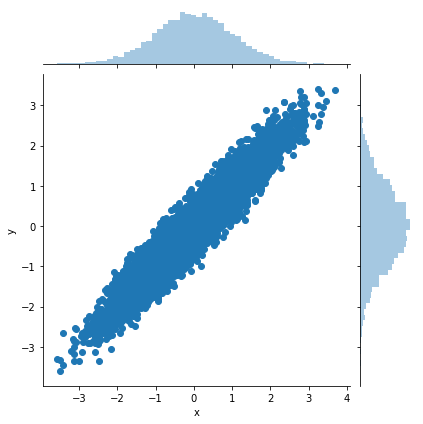

In [324]:
# a 2D multivariate normal distribution with 0.95 correlation
corr = gen_dat(2, 10000, 0.95)
corr_df = pd.DataFrame(corr, columns=['x', 'y'])
sns.jointplot(x='x', y='y',data=corr_df)

0.9777726826128377


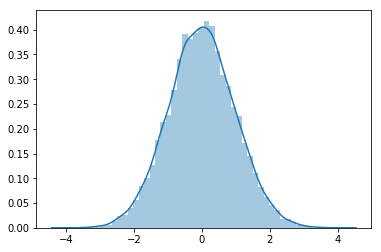

In [279]:
# Observe variance of the means from the above distribution
means = corr_df.mean(axis=1)
sns.distplot(means)
print(means.std())

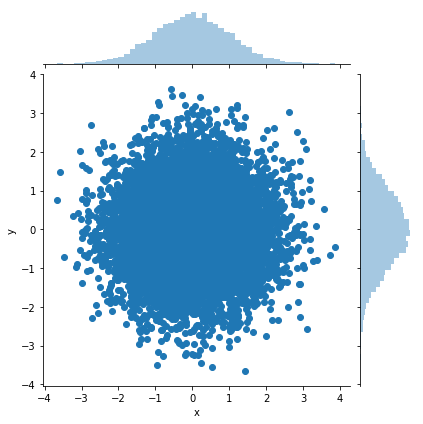

In [280]:
# a 2D multivariate normal distribution with no correlation
uncorr = gen_dat(2, 10000, 0)
uncorr_df = pd.DataFrame(uncorr, columns=['x', 'y'])
sns.jointplot(x='x', y='y', data=uncorr_df)

0.7095644181618292


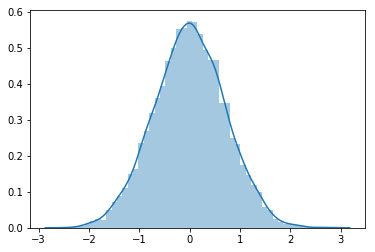

In [282]:
# Observe variance of the means from the above distribution
means = uncorr_df.mean(axis=1)
sns.distplot(means)
print(means.std())

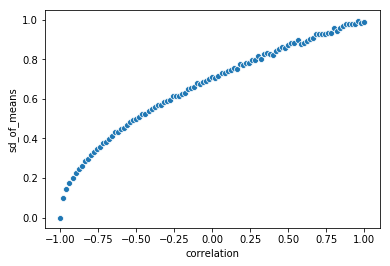

In [322]:
# Observe effect of different degrees of correlation on variance of the means

xs = np.linspace(-1, 1, num=101)
ys = [gen_dat(2, 10000, x).mean(axis=1).std() for x in xs] 
df = pd.DataFrame({'correlation' : xs, 'sd_of_means' : ys})
sns.scatterplot(x='correlation', y='sd_of_means', data=df)